In [1]:
# Import needed libraries. E.g., pandas, sklearn, nltk, etc.
import pandas as pd
import numpy as np
#for plots
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_20newsgroups

#data preprocessing for text
import re
from nltk.stem.snowball import SnowballStemmer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#feature extraction from text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import Normalizer

In [2]:
# TODO code for task 1
categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'rec.sport.hockey', 'alt.atheism', ]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))

In [3]:
#create dataframe
df = pd.DataFrame()
df['category'] = dataset.data
df['Target'] = dataset.target

In [4]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2852 non-null   object
 1   Target    2852 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.7+ KB


In [5]:
#data describe
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
category,2852,2770,,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Target,2852.0,NaN,NaN,NaN,2.08871,1.386227,0.0,1.0,2.0,3.0,4.0


In [6]:
#Checking for nulls
df.isnull().sum()

,0
category,0
Target,0


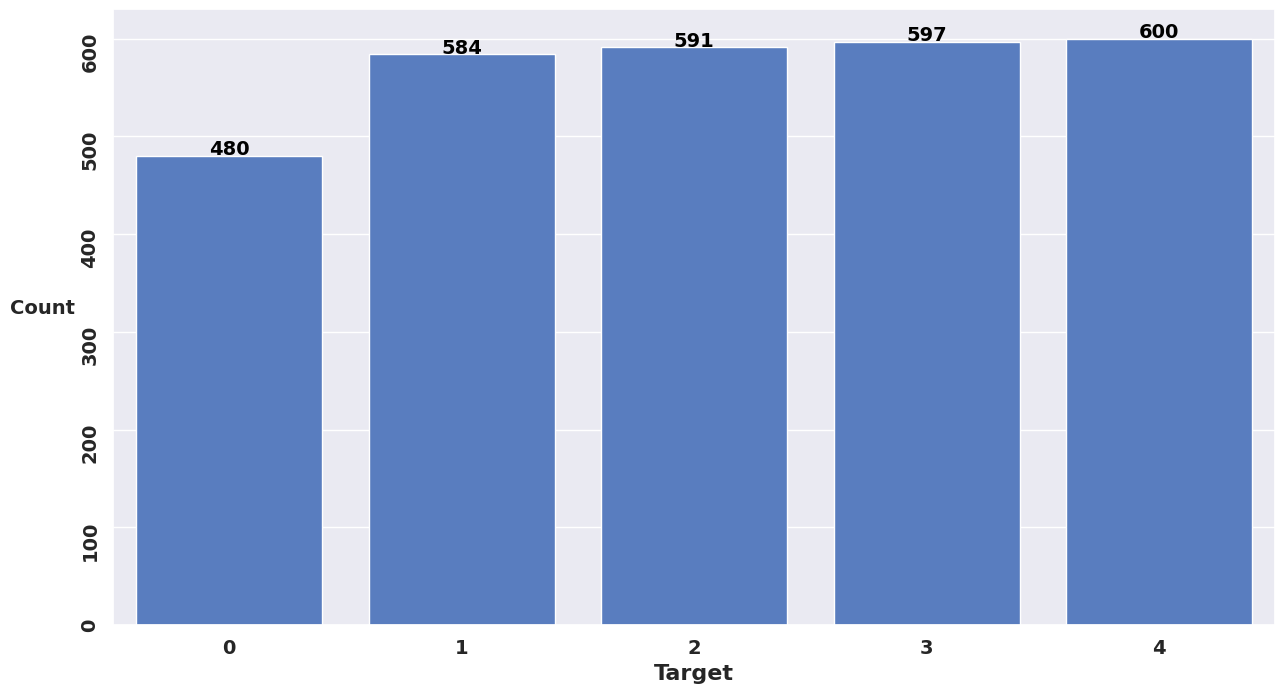

In [8]:
#target column distribution
plt.figure(figsize=(15,8))
sns.set(palette="muted", color_codes=True)
first_15 = sns.barplot(x=df['Target'].value_counts().index, y=df['Target'].value_counts().values)
plt.xticks( fontsize=14, fontweight='bold')
plt.xlabel('Target', fontsize=16, fontweight='bold')
plt.yticks(rotation='vertical', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')

for patch in first_15.patches:
  first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()), ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

/tmp/ipython-input-9-3761435878.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


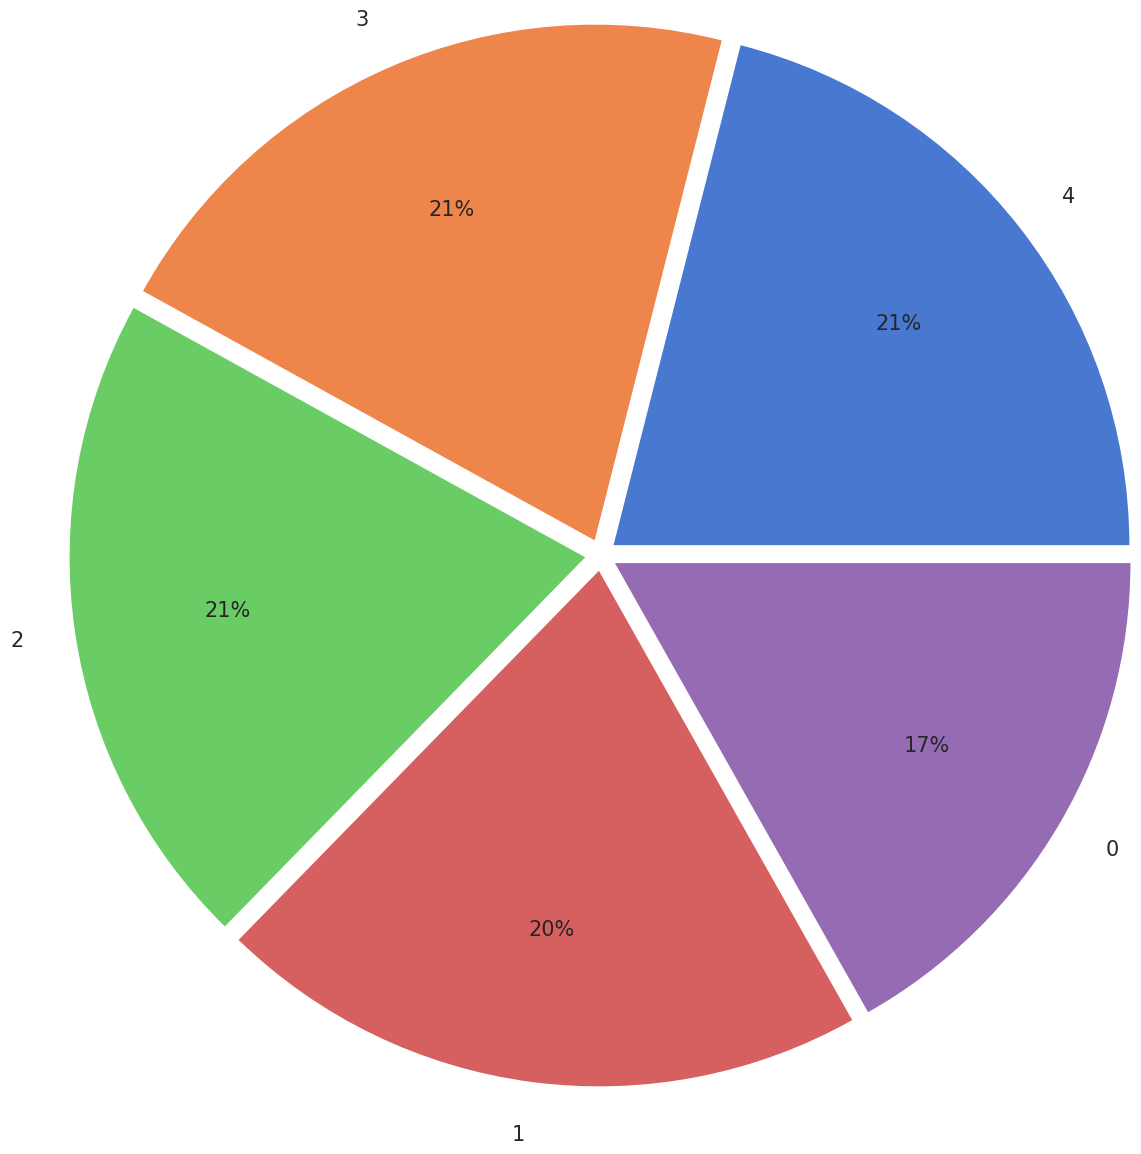

In [9]:
#explsion
explode = (0.1,0.1,0.1,0.1,0.1)
# Pie chart
df['Target'].value_counts().plot.pie(radius = 3.5, autopct='%.0f%%', pctdistance=0.7, explode = explode, textprops={'fontsize': 15})
#draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [10]:
# Downloading some packages
nltk.download("stopwords")
stopwords_ = stopwords.words('english')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
#Text cleaning
stemmer = WordNetLemmatizer()
stemmer = SnowballStemmer(language='english')
def preprocess_text(text):
    text = text.lower()
    # remove links
    text = re.sub(r"http\S+", " ", text)
    #remove any html tags (< /br> often found)
    text = re.sub(r"<[^>]+>", " ", text)
    #convert all whitespaces (tabs etc.) to single wspace
    text = re.sub(r"\s+", " ", text)
    #   # remove special chars and numbers
    text = re.sub(r"\b[A-Za-z]\b", " ", text)
    text = re.sub(r"[^\w]", " ", text)
    text = text.split()
    text = [stemmer.stem(word) for word in text if not word in set(stopwords_)]
    text = ' '.join(text)
    return text

In [12]:
%%time
#apply the preprocess_text Function on text column and create a new column called clean_text column
df['clean_text'] = df['category'].apply(preprocess_text)

CPU times: user 4.76 s, sys: 17 ms, total: 4.78 s
Wall time: 4.78 s


In [13]:
df['clean_text'][0]

'move borland 3 0 visual today tri compil program complain function prototyp problem turn typedef word ms byte unsign int could anyon shine light subject word byte ming lin'

In [14]:
df.head()

,category,Target,clean_text
0,I just moved from Borland C++ 3.0 to Visual C+...,2,move borland 3 0 visual today tri compil progr...
1,\n: \tNice cop out bill.\n\nI'm sure you're ri...,0,nice cop bill sure right idea refer would mind...
2,I'm attempting to transfer files from my home ...,2,attempt transfer file home comput run window 3...
3,\nThen not murdering would have no moral signi...,0,murder would moral signific sinc would noth vo...
4,\nI could give much the same testimonial about...,0,could give much testimoni experi scout back 19...


In [15]:
# TODO code for task 3, hint, you can use TfidfVectorizer from sklearn
tfidf=TfidfVectorizer(use_idf=True, stop_words='english', max_df=0.8, min_df=5)
result = tfidf.fit_transform(df["clean_text"])

In [18]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=result[0]
# place tf-idf values in a pandas data frame
df_ = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf.get_feature_names_out(), columns=["tfidf"])
df_.sort_values(by=["tfidf"],ascending=False)

,tfidf
byte,0.441271
word,0.326549
prototyp,0.282834
int,0.266827
shine,0.262668
...,...
distant,0.000000
distanc,0.000000
disregard,0.000000
disput,0.000000


In [19]:
# TODO code for Task 4. Note, you just need to change init parameter to swtich between random intilization and k-means++ initialization.
#init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’

In [20]:
#create Kmeans object with 5 clusters
KM = KMeans(n_clusters = 5, init = 'random', n_init = 10, max_iter = 300, tol = 1e-0)
KM.fit(result)

KMeans(init='random', n_clusters=5, n_init=10, tol=1.0)

In [21]:
print('The lowest SSE value')
print(KM.inertia_, '\n=====================================================')
# Final locations of the centroid
print('Final locations of the centroid')
print(KM.cluster_centers_, '\n=====================================================')
# The number of iterations required to converge
print('The number of iterations required to converge')
print(KM.n_iter_, '\n=====================================================')
# first five predicted labels
print('first five predicted labels')
print(KM.labels_[:5], '\n=====================================================')

The lowest SSE value
2647.0004744660246 
Final locations of the centroid
[[2.12766028e-03 4.02677031e-04 4.35430087e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.79273434e-03 4.46413761e-03 5.37417289e-04 ... 0.00000000e+00
  0.00000000e+00 1.80197260e-03]
 [4.01534880e-03 3.06519655e-03 2.06944063e-03 ... 1.36991988e-04
  6.42395436e-05 0.00000000e+00]
 [0.00000000e+00 4.06167774e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.71892435e-04 1.42012502e-03 1.07164822e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 
The number of iterations required to converge
15 
first five predicted labels
[2 2 0 3 2] 


In [22]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['Target'], KM.labels_), '\n=====================================================')
print("Completeness: %0.3f" % metrics.completeness_score(df['Target'], KM.labels_), '\n=====================================================')
print("V-measure: %0.3f" % metrics.v_measure_score(df['Target'], KM.labels_), '\n=====================================================')
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(df['Target'], KM.labels_), '\n=====================================================')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(result, KM.labels_, sample_size=1000), '\n=====================================================')
print("mutual_info_score: %0.3f" % metrics.mutual_info_score(df['Target'], KM.labels_), '\n=====================================================')

Homogeneity: 0.346 
Completeness: 0.401 
V-measure: 0.371 
Adjusted Rand-Index: 0.187 
Silhouette Coefficient: 0.010 
mutual_info_score: 0.556 


In [23]:
#create Kmeans++ object with 5 clusters
KM_plus = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-0)
KM_plus.fit(result)

KMeans(n_clusters=5, n_init=10, tol=1.0)

In [24]:
print('The lowest SSE value')
print(KM_plus.inertia_, '\n=====================================================')
# Final locations of the centroid
print('Final locations of the centroid')
print(KM_plus.cluster_centers_, '\n=====================================================')
# The number of iterations required to converge
print('The number of iterations required to converge')
print(KM_plus.n_iter_, '\n=====================================================')
# first five predicted labels
print('first five predicted labels')
print(KM_plus.labels_[:5], '\n=====================================================')

The lowest SSE value
2647.641162560173 
Final locations of the centroid
[[3.67451921e-03 2.75792718e-03 2.28021699e-03 ... 1.50944875e-04
  7.07824601e-05 0.00000000e+00]
 [2.19277263e-03 8.09547236e-04 5.22082840e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.55740418e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.16792718e-03 4.42639252e-03 4.44704950e-04 ... 0.00000000e+00
  0.00000000e+00 1.49110598e-03]
 [2.15718391e-03 9.73358043e-04 6.52495491e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 
The number of iterations required to converge
11 
first five predicted labels
[0 0 1 2 0] 


In [25]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['Target'], KM_plus.labels_), '\n=====================================================')
print("Completeness: %0.3f" % metrics.completeness_score(df['Target'], KM_plus.labels_), '\n=====================================================')
print("V-measure: %0.3f" % metrics.v_measure_score(df['Target'], KM_plus.labels_), '\n=====================================================')
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(df['Target'], KM_plus.labels_), '\n=====================================================')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(result, KM_plus.labels_, sample_size=1000), '\n=====================================================')
print("mutual_info_score: %0.3f" % metrics.mutual_info_score(df['Target'], KM_plus.labels_), '\n=====================================================')

Homogeneity: 0.373 
Completeness: 0.415 
V-measure: 0.393 
Adjusted Rand-Index: 0.208 
Silhouette Coefficient: 0.008 
mutual_info_score: 0.599 


In [27]:

svd = TruncatedSVD(n_components = 2)
X = svd.fit_transform(result)

#create Kmeans object with 5 clusters
KM_SVD = KMeans(n_clusters = 5, init = 'random', n_init = 10, max_iter = 300, tol = 1e-0)
KM_SVD.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, tol=1.0)

In [28]:
print('The lowest SSE value')
print(KM_SVD.inertia_, '\n=====================================================')
# Final locations of the centroid
print('Final locations of the centroid')
print(KM_SVD.cluster_centers_, '\n=====================================================')
# The number of iterations required to converge
print('The number of iterations required to converge')
print(KM_SVD.n_iter_, '\n=====================================================')
# first five predicted labels
print('first five predicted labels')
print(KM_SVD.labels_[:5], '\n=====================================================')

The lowest SSE value
7.07690332715403 
Final locations of the centroid
[[ 0.1300623   0.04729091]
 [ 0.12647625 -0.0769582 ]
 [ 0.20214091  0.16211018]
 [ 0.04824339 -0.01455303]
 [ 0.19503095 -0.17371379]] 
The number of iterations required to converge
2 
first five predicted labels
[0 3 2 1 3] 


In [29]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['Target'], KM_SVD.labels_), '\n=====================================================')
print("Completeness: %0.3f" % metrics.completeness_score(df['Target'], KM_SVD.labels_), '\n=====================================================')
print("V-measure: %0.3f" % metrics.v_measure_score(df['Target'], KM_SVD.labels_), '\n=====================================================')
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(df['Target'], KM_SVD.labels_), '\n=====================================================')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(result, KM_SVD.labels_, sample_size=1000), '\n=====================================================')
print("mutual_info_score: %0.3f" % metrics.mutual_info_score(df['Target'], KM_SVD.labels_), '\n=====================================================')

Homogeneity: 0.285 
Completeness: 0.294 
V-measure: 0.290 
Adjusted Rand-Index: 0.177 
Silhouette Coefficient: -0.009 
mutual_info_score: 0.458 


In [30]:
#create Kmeans++ object with 5 clusters
KM_plus_SVD = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-0)
KM_plus_SVD.fit(X)

KMeans(n_clusters=5, n_init=10, tol=1.0)

In [31]:
print('The lowest SSE value')
print(KM_plus_SVD.inertia_, '\n=====================================================')
# Final locations of the centroid
print('Final locations of the centroid')
print(KM_plus_SVD.cluster_centers_, '\n=====================================================')
# The number of iterations required to converge
print('The number of iterations required to converge')
print(KM_plus_SVD.n_iter_, '\n=====================================================')
# first five predicted labels
print('first five predicted labels')
print(KM_plus_SVD.labels_[:5], '\n=====================================================')

The lowest SSE value
7.038624495211097 
Final locations of the centroid
[[ 0.21354827 -0.18724715]
 [ 0.13465638  0.06022775]
 [ 0.13135337 -0.08585192]
 [ 0.20897578  0.16793473]
 [ 0.05408357 -0.01450501]] 
The number of iterations required to converge
2 
first five predicted labels
[1 4 3 2 4] 


In [32]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['Target'], KM_plus_SVD.labels_), '\n=====================================================')
print("Completeness: %0.3f" % metrics.completeness_score(df['Target'], KM_plus_SVD.labels_), '\n=====================================================')
print("V-measure: %0.3f" % metrics.v_measure_score(df['Target'], KM_plus_SVD.labels_), '\n=====================================================')
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(df['Target'], KM_plus_SVD.labels_), '\n=====================================================')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(result, KM_plus_SVD.labels_, sample_size=1000), '\n=====================================================')
print("mutual_info_score: %0.3f" % metrics.mutual_info_score(df['Target'], KM_plus_SVD.labels_), '\n=====================================================')

Homogeneity: 0.283 
Completeness: 0.298 
V-measure: 0.291 
Adjusted Rand-Index: 0.172 
Silhouette Coefficient: 0.000 
mutual_info_score: 0.455 


In [33]:
#Create a dictionary
data = {'Kmean' : metrics.mutual_info_score(df['Target'], KM.labels_), 'Kmean++': metrics.mutual_info_score(df['Target'], KM_plus.labels_),
        'Kmean SVD': metrics.mutual_info_score(df['Target'], KM_SVD.labels_), 'Kmean++ SVD': metrics.mutual_info_score(df['Target'], KM_plus_SVD.labels_)}

#create a list from this dictionary keys and values
algorithms = list(data.keys())
score = list(data.values())

In [34]:
#convert the dictionary to data frame to see the scores in good way
dat = pd.DataFrame.from_dict(data, orient='index').T
dat

,Kmean,Kmean++,Kmean SVD,Kmean++ SVD
0,0.555776,0.598639,0.458281,0.455008


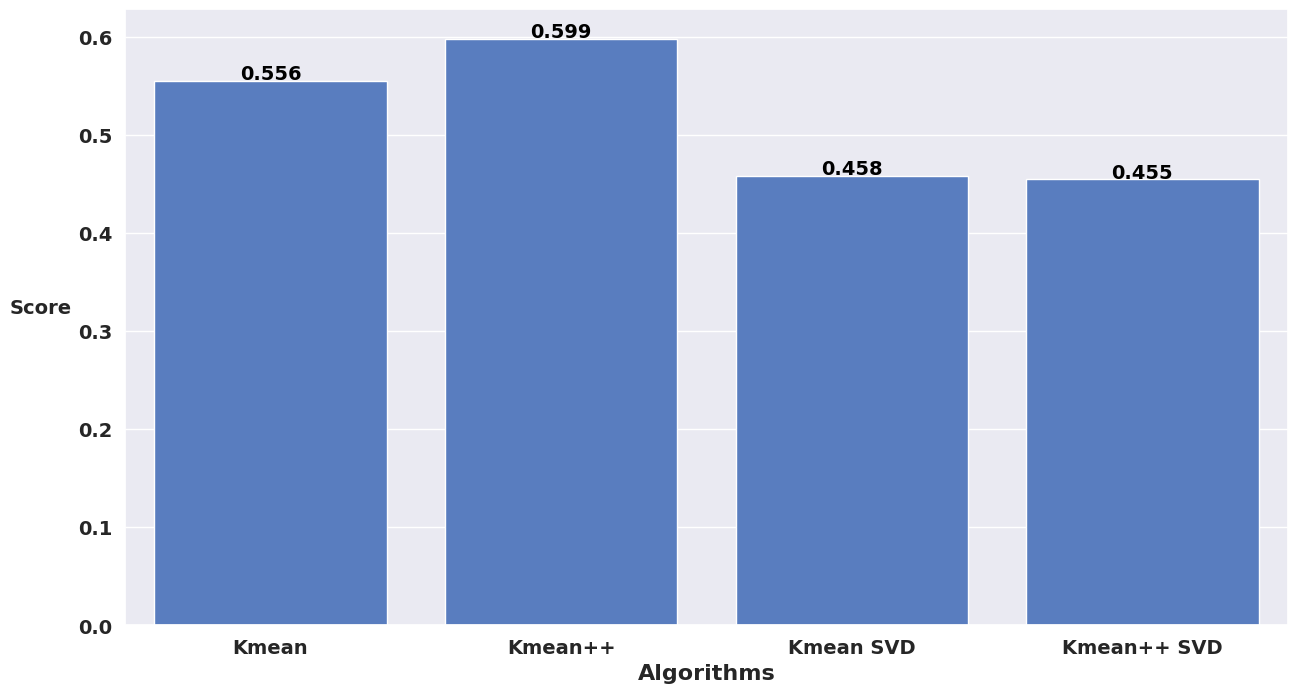

In [38]:
#plot the result of each algorithm and its scores
plt.figure(figsize=(15,8))
sns.set(palette="muted", color_codes=True)
first_15 = sns.barplot(x=algorithms, y=score)
plt.xticks( fontsize=14, fontweight='bold')
plt.xlabel('Algorithms', fontsize=16, fontweight='bold')
plt.yticks(rotation='vertical', fontsize=14, fontweight='bold')
plt.ylabel('Score', rotation=0, ha='right', fontsize=14, fontweight='bold')

for patch in first_15.patches:
  first_15.annotate("%.3f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()), ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

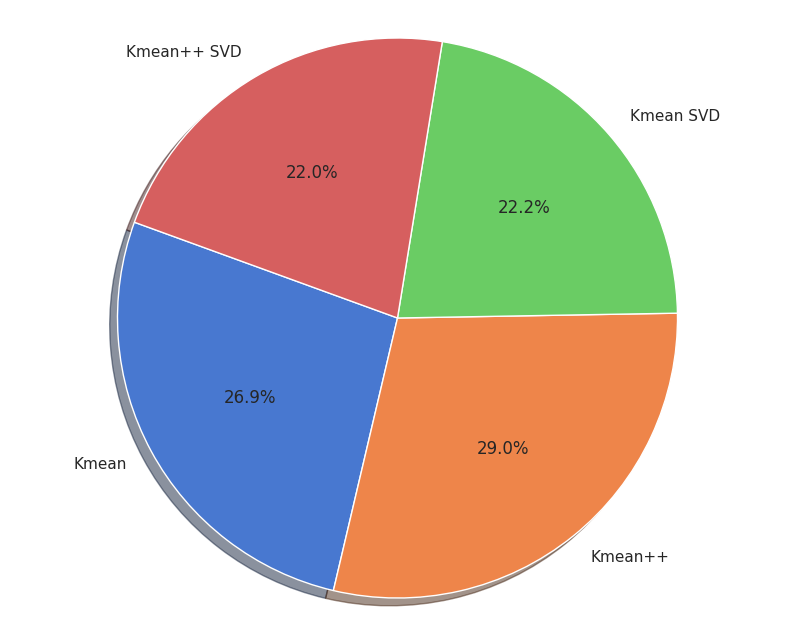

In [39]:
plt.figure(figsize=(10,8))
plt.pie(score, labels=algorithms, autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')
plt.show()

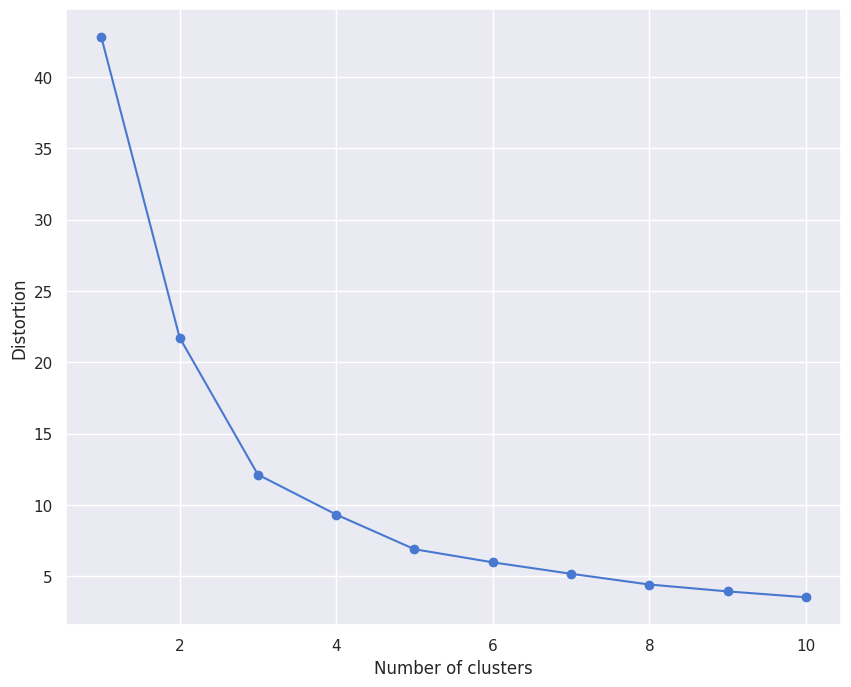

In [40]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()